# **1. Plot all data points using a scatter plot**

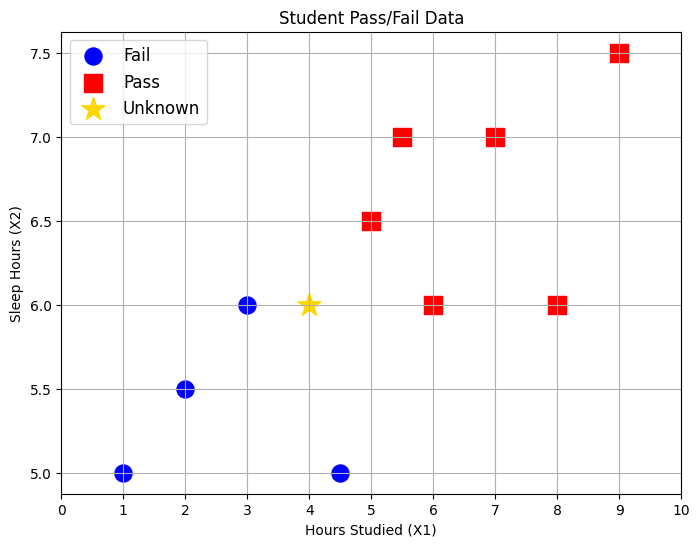

In [ ]:
# @title
# TASK 1: Scatter Plot of Training Data
import matplotlib.pyplot as plt

# Training data
X1 = [1.0,2.0,3.0,4.5,5.0,5.5,6.0,7.0,8.0,9.0]
X2 = [5.0,5.5,6.0,5.0,6.5,7.0,6.0,7.0,6.0,7.5]
Y  = [0,0,0,0,1,1,1,1,1,1]

# Separate pass/fail
X1_fail = [X1[i] for i in range(len(Y)) if Y[i]==0]
X2_fail = [X2[i] for i in range(len(Y)) if Y[i]==0]

X1_pass = [X1[i] for i in range(len(Y)) if Y[i]==1]
X2_pass = [X2[i] for i in range(len(Y)) if Y[i]==1]

# Unknown student
X1_new = 4
X2_new = 6

plt.figure(figsize=(8,6))
plt.scatter(X1_fail, X2_fail, c='blue', marker='o', s=150, label='Fail')
plt.scatter(X1_pass, X2_pass, c='red', marker='s', s=150, label='Pass')
plt.scatter(X1_new, X2_new, c='gold', marker='*', s=300, label='Unknown')

plt.xlabel('Hours Studied (X1)')
plt.ylabel('Sleep Hours (X2)')
plt.title('Student Pass/Fail Data')
plt.legend(fontsize=12)
plt.xticks(range(0,11))
plt.yticks([5,5.5,6,6.5,7,7.5])
plt.grid(True)
plt.show()


# **2. Compute Distances**

In [ ]:
# @title
# TASK 2: Compute Euclidean Distances
import math

distances = [math.sqrt((X1[i]-X1_new)**2 + (X2[i]-X2_new)**2) for i in range(len(X1))]

# Display table
import pandas as pd

df = pd.DataFrame({
    "Student": list(range(1,11)),
    "Hours Studied (X1)": X1,
    "Sleep Hours (X2)": X2,
    "Pass/Fail (Y)": Y,
    "Euclidean Distance": distances
})

df

,Student,Hours Studied (X1),Sleep Hours (X2),Pass/Fail (Y),Euclidean Distance
0,1,1.0,5.0,0,3.162278
1,2,2.0,5.5,0,2.061553
2,3,3.0,6.0,0,1.000000
3,4,4.5,5.0,0,1.118034
4,5,5.0,6.5,1,1.118034
5,6,5.5,7.0,1,1.802776
6,7,6.0,6.0,1,2.000000
7,8,7.0,7.0,1,3.162278
8,9,8.0,6.0,1,4.000000
9,10,9.0,7.5,1,5.220153


# **3. Find the 3 Nearest Neighbors**

In [ ]:
# @title
# TASK 3: Highlight 3 Nearest Neighbors (Original Order)
# Find indices of 3 nearest neighbors
nearest_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:3]

# Highlight nearest neighbors with readable letters
def highlight_nearest(row):
    if row.name in nearest_indices:
        return ['background-color: lightgreen; color: black' for _ in row]
    else:
        return ['' for _ in row]

df.style.apply(highlight_nearest, axis=1)


,Student,Hours Studied (X1),Sleep Hours (X2),Pass/Fail (Y),Euclidean Distance
0,1,1.000000,5.000000,0,3.162278
1,2,2.000000,5.500000,0,2.061553
2,3,3.000000,6.000000,0,1.000000
3,4,4.500000,5.000000,0,1.118034
4,5,5.000000,6.500000,1,1.118034
5,6,5.500000,7.000000,1,1.802776
6,7,6.000000,6.000000,1,2.000000
7,8,7.000000,7.000000,1,3.162278
8,9,8.000000,6.000000,1,4.000000
9,10,9.000000,7.500000,1,5.220153


# **4. Majority Vote**

In [ ]:
# @title
# Count Pass/Fail and Prediction
count_pass = sum(nearest_neighbors['Pass/Fail (Y)'])
count_fail = 3 - count_pass

prediction = "Pass" if count_pass > count_fail else "Fail"

print(f"Count Pass (1): {count_pass}")
print(f"Count Fail (0): {count_fail}")
print(f"\nPrediction: A new student who studied 4 hours and slept 6 hours will **{prediction}** the exam.")


Count Pass (1): 1
Count Fail (0): 2

Prediction: A new student who studied 4 hours and slept 6 hours will **Fail** the exam.


# **5. Discussion Questions**

In [50]:
# @title
# TASK 5: Discussion Questions
print("Discussion Questions:")
print("1. What was your final prediction?")
print(f"   -> The prediction is: {prediction}")
print("\n2. How would the prediction change if we used k = 5 instead of k = 3?")

# Find 5 nearest neighbors
nearest_indices_k5 = sorted(range(len(distances)), key=lambda i: distances[i])[:5]
nearest_neighbors_k5 = df.iloc[nearest_indices_k5]
count_pass_k5 = sum(nearest_neighbors_k5['Pass/Fail (Y)'])
count_fail_k5 = 5 - count_pass_k5

print(f"   -> Nearest 5 neighbors count Pass: {count_pass_k5}, Fail: {count_fail_k5}")
prediction_k5 = "Pass" if count_pass_k5 > count_fail_k5 else "Fail"
print(f"   -> Prediction with k=5: {prediction_k5}")


Discussion Questions:
1. What was your final prediction?
   -> The prediction is: Fail

2. How would the prediction change if we used k = 5 instead of k = 3?
   -> Nearest 5 neighbors count Pass: 3, Fail: 2
   -> Prediction with k=5: Pass
